<a href="https://colab.research.google.com/github/Redjo1258/DataRepo/blob/main/Covid_19_Temporal_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pandas
!pip install geopandas
!pip install libpysal
!pip install matplotlib
!pip install mapclassify
!pip install scipy
!pip install fiona
!pip install esda

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 44.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 5.8 MB/s eta 0:00:00


In [3]:
from google.colab import files
upload = files.upload()

Saving Jakarta.cpg to Jakarta.cpg
Saving Jakarta.dbf to Jakarta.dbf
Saving Jakarta.prj to Jakarta.prj
Saving Jakarta.sbn to Jakarta.sbn
Saving Jakarta.sbx to Jakarta.sbx
Saving Jakarta.shp to Jakarta.shp
Saving Jakarta.shx to Jakarta.shx


In [4]:
import fiona
jakarta = fiona.open('Jakarta.shp')
jakarta.schema

{'properties': {'OBJECT_ID': 'float:19.11',
  'KODE_DESA': 'str:10',
  'DESA': 'str:150',
  'PROVINSI': 'str:26',
  'KAB_KOTA': 'str:27',
  'KECAMATAN': 'str:31',
  'DESA_KELUR': 'str:34',
  'JUMLAH_PEN': 'float:19.11',
  'Join_Count': 'int:10',
  'TARGET_FID': 'int:10',
  'FID_': 'int:10',
  'OBJECT_I_1': 'int:10',
  'KODE_DES_1': 'float:19.11',
  'PROVINSI_1': 'str:254',
  'KAB_KOTA_1': 'str:254',
  'KECAMATA_1': 'str:254',
  'DESA_1': 'str:254',
  'JUMLAH_P_1': 'int:10',
  'LUAS_DESA': 'int:10',
  'X': 'float:19.11',
  'Y': 'float:19.11',
  'mar_pos': 'int:10',
  'mar_cure': 'int:10',
  'mar_died': 'int:10',
  'Maret': 'int:10',
  'apr_pos': 'int:10',
  'apr_cure': 'int:10',
  'apr_died': 'int:10',
  'april': 'int:10',
  'mei_pos': 'int:10',
  'mei_cure': 'int:10',
  'mei_died': 'int:10',
  'MEI': 'int:10',
  'jun_pos': 'int:10',
  'jun_cure': 'int:10',
  'jun_died': 'int:10',
  'juni': 'int:10',
  'jul_pos': 'int:10',
  'jul_cure': 'int:10',
  'jul_died': 'int:10',
  'juli': 'int:1

In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt
import libpysal as ps
import mapclassify as mc
import pandas
import numpy
import matplotlib.pyplot as plt
from sklearn.preprocessing import robust_scale
from sklearn.cluster import KMeans

In [6]:
jakarta = gpd.read_file('Jakarta.shp')

<Axes: >

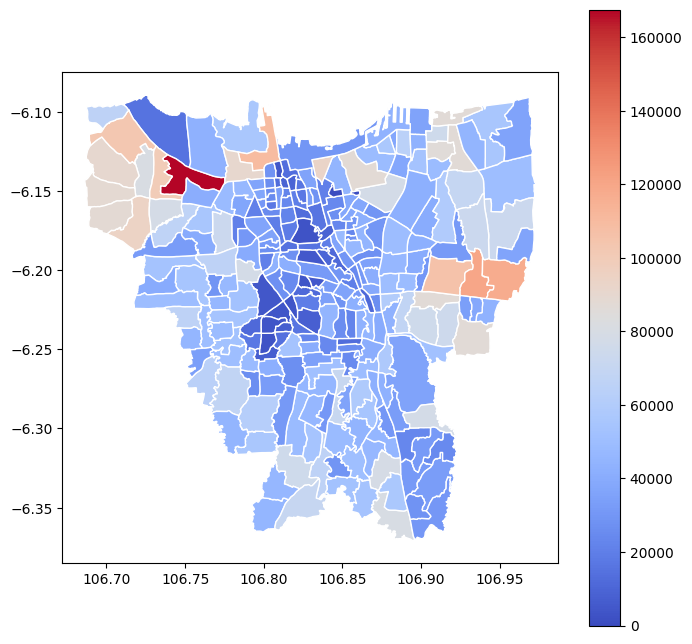

In [23]:
jakarta.plot(column='JUMLAH_PEN', cmap='coolwarm', edgecolor='white',
legend=True,figsize=(8,8))

In [10]:
bln_positif = ['mar_pos','apr_pos','mei_pos','jun_pos','jul_pos','agt_pos',
'sep_pos','okt_pos','nov_pos','des_pos','jan_pos','feb_pos']

In [16]:
klasifikasi = mc.Pooled(jakarta[bln_positif],
classifier="Quantiles", k=5)

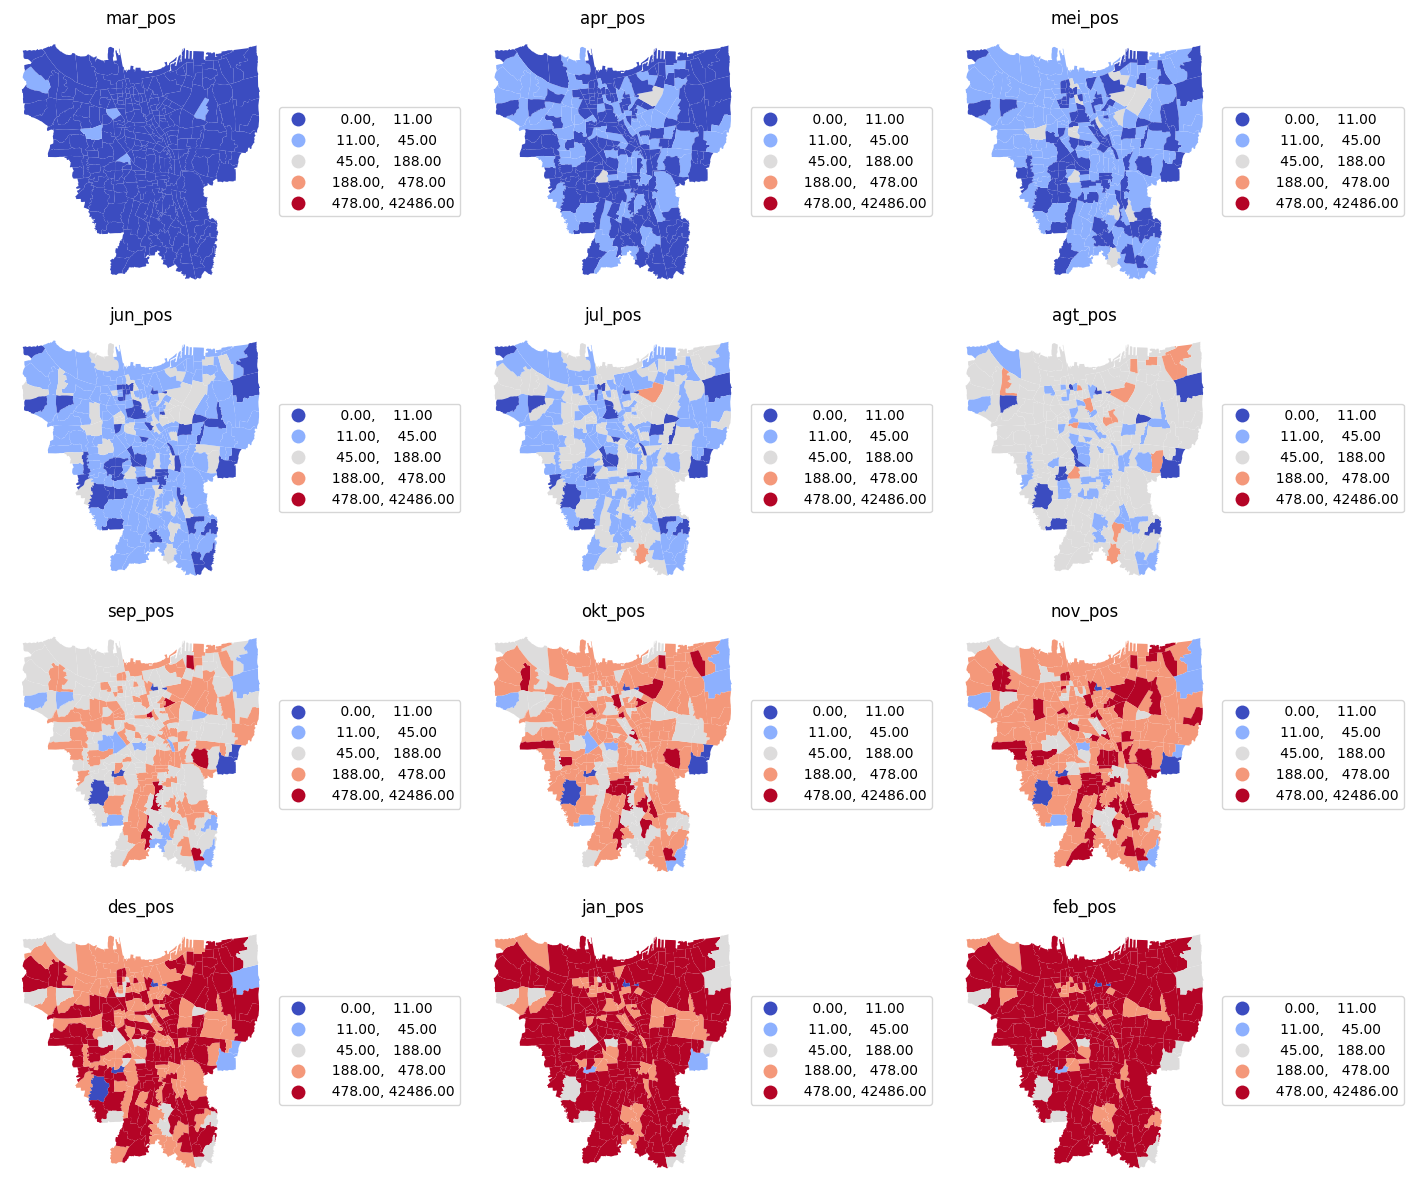

In [18]:
#setup layout
f, axs = plt.subplots(4, 3, figsize=(15, 12))
axs = axs.flatten()
#menampilkan data
for i, y in enumerate(bln_positif):
 jakarta.plot(
  y, # Tahun
  scheme="UserDefined", # Gunakan bins user
 classification_kwds={
 "bins": klasifikasi.global_classifier.bins
 }, # Menggunakan global bins
  cmap='coolwarm', legend=True, legend_kwds={'loc': 'center left',
'bbox_to_anchor':(1,0.5)}, # menambahkan dan mengatur legenda
 ax=axs[i], # Plot axis
 )
 # Mengilangkan axis
 axs[i].set_axis_off()
 # Memberi label sesuai kolom
 axs[i].set_title(y)
# mengatur spasi
plt.tight_layout()
# menampilkan gambar
plt.show()

In [19]:
db_scaled = robust_scale(jakarta[bln_positif])

In [20]:
kmeans = KMeans(n_clusters=5)

In [21]:
numpy.random.seed(1234)
# Run K-Means algorithm
k5cls = kmeans.fit(db_scaled)

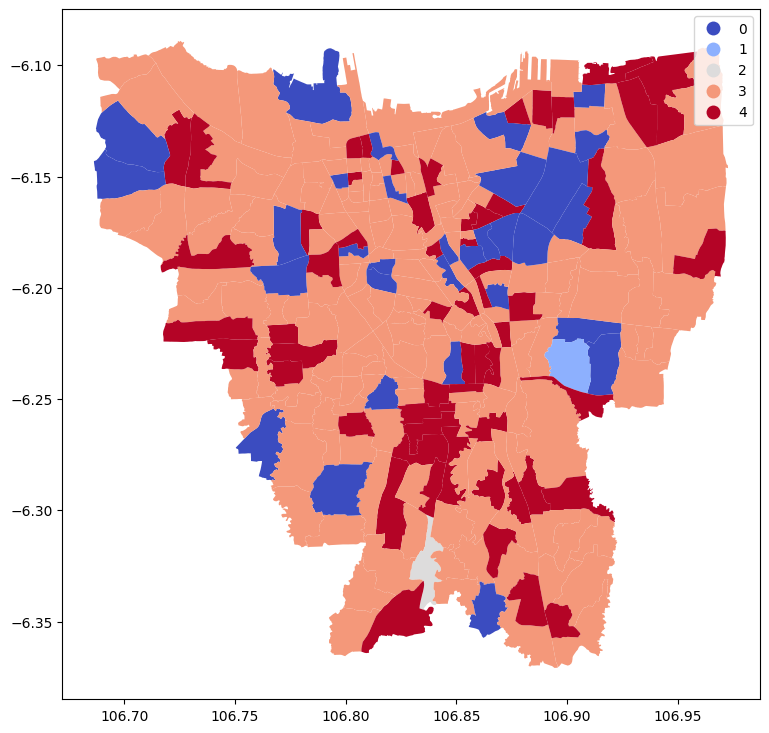

In [22]:
# Assign labels into a column
jakarta["k5cls"] = k5cls.labels_
# Setup figure and ax
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot unique values choropleth including
# a legend and with no boundary lines
jakarta.plot(
cmap='coolwarm', edgecolor='black', column="k5cls", categorical=True, legend=True, linewidth=0, ax=ax
)
# Display the map
plt.show()